<a href="https://colab.research.google.com/github/idowujames/unicorn-companies/blob/main/Unicorn_Companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyforest --quiet

In [2]:
import pyforest

## Questions to be answered
- Which unicorn companies have had the biggest return on investment?

- How long does it usually take for a company to become a unicorn? Has it always been this way?

- Which countries have the most unicorns? Are there any cities that appear to be industry hubs?

- Which investors have funded the most unicorns?

### Gathering the Dataset

In [3]:
# df_data = pd.read_csv('Data_Dictionary.csv')
df_comp = pd.read_csv('https://raw.githubusercontent.com/idowujames/unicorn-companies/main/Unicorn_Companies.csv')

<IPython.core.display.Javascript object>

In [4]:
df_comp.sample(n=8, random_state=1)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
635,Qingting FM,$1B,2021-06-02,Internet software & services,Shanghai,China,Asia,2011,$164M,"China Culture Industrial Investment Fund, We C..."
428,Zenoti,$2B,2020-12-15,Internet software & services,Bellevue,United States,North America,2010,$331M,"Norwest Venture Partners, Accel, Tiger Global ..."
49,OutSystems,$10B,2018-06-05,Internet software & services,Boston,United States,North America,2001,$572M,"KKR, ES Ventures, North Bridge Growth Equity"
204,Articulate,$4B,2021-07-01,Edtech,New York,United States,North America,2015,$2B,"Blackstone, ICONIQ Growth, General Atlantic"
998,PicsArt,$1B,2021-08-26,Mobile & telecommunications,San Francisco,United States,North America,2011,$195M,"Sequoia Capital, DCM Ventures, Insight Partners"
80,Ramp,$8B,2021-03-29,Fintech,New York,United States,North America,2019,$660M,"D1 Capital Partners, Stripe, Coatue Management"
345,Outschool,$3B,2021-04-14,Edtech,San Francisco,United States,North America,2015,$240M,"Uniion Square Ventures, Tiger Global Managemen..."
531,Moveworks,$2B,2021-06-30,Artificial intelligence,Mountain View,United States,North America,2016,$305M,"Lightspeed Venture Partners, Sapphire Ventures..."


In [5]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


## Data Wrangling

- Create a copy of the dataframe for cleaning
- Change valuation from object datatype to float datatype
- Change date joined from object datatype to datetime
- Change funding from object datatype to float datatype
- Rename all columns to be more pythonic
- Deal with missing values

### Creating a copy of the dataframe for cleaning


In [6]:
df = df_comp.copy()

df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


#### Changing valuation from object datatype to float datatype

In [7]:
df['Valuation'] = df['Valuation'].str.extract('(\d+)').astype('float')

### Test

In [8]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1074 non-null   object 
 1   Valuation         1074 non-null   float64
 2   Date Joined       1074 non-null   object 
 3   Industry          1074 non-null   object 
 4   City              1058 non-null   object 
 5   Country           1074 non-null   object 
 6   Continent         1074 non-null   object 
 7   Year Founded      1074 non-null   int64  
 8   Funding           1074 non-null   object 
 9   Select Investors  1073 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 84.0+ KB


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180.0,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.0,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."


### Change date joined from object datatype to datetime

In [9]:
df['Date Joined'] = df['Date Joined'].apply(pd.to_datetime)
df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   float64       
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 84.0+ KB


### Changing funding from object datatype to float datatype

In [10]:
import re
def funds(x):
  if 'B' in x:
    value  = float(re.findall('\d+', x)[0])
  elif 'M' in x:
    value = round(float(re.findall('\d+', x)[0]) * 0.001, 3)
  else:
    # Using an abituary low number to reflect missing or unknown values
    value = None
  return value

df['Funding'] = df['Funding'].apply(funds)

### Rename all columns to be more pythonic

In [11]:
# Make all column names be lowercase
df.columns = df.columns.str.lower()

# Making the columns be underscore seperated
df.columns = df.columns.str.replace(' ','_')

# Rename column valuation and funding to reflect that the values are in billion dollars
df.rename(columns={'valuation': 'valuation(B/$)', 'funding': 'funding(B/$)'}, inplace = True)



### Test

In [12]:
print(df.info())

df.sample(n=5, random_state=2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   company           1074 non-null   object        
 1   valuation(B/$)    1074 non-null   float64       
 2   date_joined       1074 non-null   datetime64[ns]
 3   industry          1074 non-null   object        
 4   city              1058 non-null   object        
 5   country           1074 non-null   object        
 6   continent         1074 non-null   object        
 7   year_founded      1074 non-null   int64         
 8   funding(B/$)      1062 non-null   float64       
 9   select_investors  1073 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 84.0+ KB
None


,company,valuation(B/$),date_joined,industry,city,country,continent,year_founded,funding(B/$),select_investors
577,Magic Leap,2.0,2014-10-21,Hardware,Plantation,United States,North America,2010,3.000,"Obvious Ventures, Qualcomm Ventures, Andreesse..."
519,Volocopter,2.0,2022-03-04,Auto & transportation,Bruchsal,Germany,Europe,2011,0.599,"btov Partners, Geely, Intel Capital"
919,Fractal Analytics,1.0,2022-01-05,Data management & analytics,Mumbai,India,Asia,2000,0.685,"TPG Capital, Apax Partners, TA Associates"
923,Geek+,1.0,2018-11-21,Hardware,Beijing,China,Asia,2015,0.439,"Volcanics Ventures, Vertex Ventures China, War..."
67,N26,9.0,2019-01-10,Fintech,Berlin,Germany,Europe,2013,2.000,"Redalpine Venture Partners, Earlybird Venture ..."


### Fixing missing values

In [13]:
df.isna().sum().sort_values(ascending= False)

city                16
funding(B/$)        12
select_investors     1
company              0
valuation(B/$)       0
date_joined          0
industry             0
country              0
continent            0
year_founded         0
dtype: int64

The only column that is really of concern for us is the funding column.

We can further investigate the missing values in the funding column to know how to deal with the missing values

In [14]:
df[df['funding(B/$)'].isna()]

,company,valuation(B/$),date_joined,industry,city,country,continent,year_founded,funding(B/$),select_investors
215,SSENSE,4.0,2021-06-08,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,NaN,Sequoia Capital
424,Uplight,2.0,2021-03-03,Other,Boulder,United States,North America,2019,NaN,"Rubicon Technology Partners, Max Ventures, Inc..."
567,ISN,2.0,2020-12-17,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,NaN,Blackstone
639,SITECH DEV,1.0,2019-05-16,Other,Guiyang,China,Asia,2017,NaN,China Prosperity Capital
651,Xiaobing,1.0,2021-07-12,Fintech,Beijing,China,Asia,2020,NaN,"NetEase Capital, Northern Light Venture Capita..."
717,Veepee,1.0,2007-07-02,E-commerce & direct-to-consumer,La Plaine Saint-Denis,France,Europe,2001,NaN,"Summit Partners, Qatar Holding"
733,DistroKid,1.0,2021-08-16,Internet software & services,New York,United States,North America,2013,NaN,"Insight Partners, Silversmith Capital Partners..."
866,Assembly,1.0,2021-09-21,Internet software & services,Culver City,United States,North America,2019,NaN,"Advent International, PSG, Providence Equity P..."
890,Carson Group,1.0,2021-07-14,Fintech,Lincoln,United States,North America,2012,NaN,Bain Capital
945,Iodine Software,1.0,2021-12-01,Data management & analytics,Austin,United States,North America,2010,NaN,"Advent International, Bain Capital Ventures, S..."


## Data Exploration

### Getting statistical analysis of the dataset

In [15]:
df.describe()

,valuation(B/$),year_founded,funding(B/$)
count,1074.000000,1074.000000,1062.000000
mean,3.455307,2012.895717,0.557269
std,8.547022,5.698573,0.810134
min,1.000000,1919.000000,0.000000
25%,1.000000,2011.000000,0.223000
50%,2.000000,2014.000000,0.370000
75%,3.000000,2016.000000,0.609250
max,180.000000,2021.000000,14.000000


### Getting a visual distribution of funding and valuation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

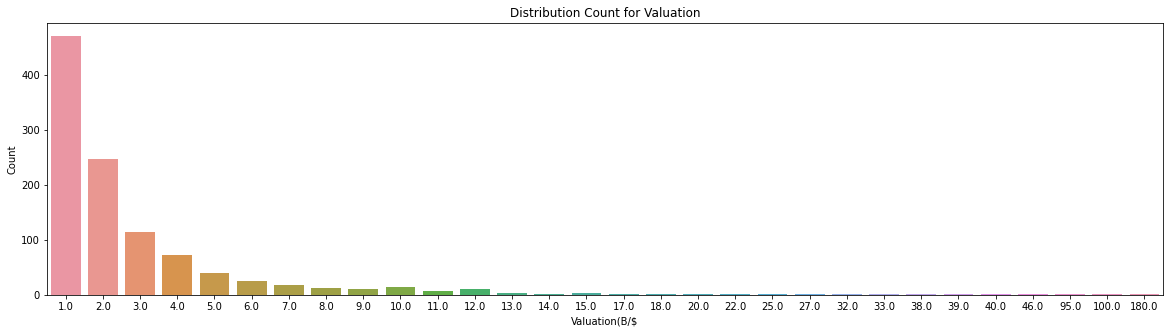

In [16]:
plt.rcParams["figure.figsize"] = (20, 5)

sns.countplot(x= 'valuation(B/$)', data = df)

plt.title('Distribution Count for Valuation')
plt.xlabel('Valuation(B/$')
plt.ylabel('Count');

### Question: Which cities have the most unicorns? Are there any cities that appear to be industry hubs

In [31]:
# Top 5 cities with the most unicorns

top_5_cites = df['city'].value_counts().head().reset_index()
top_5_cites.columns=['city', 'count']

top_5_cites

,city,count
0,San Francisco,152
1,New York,103
2,Beijing,63
3,Shanghai,44
4,London,34


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

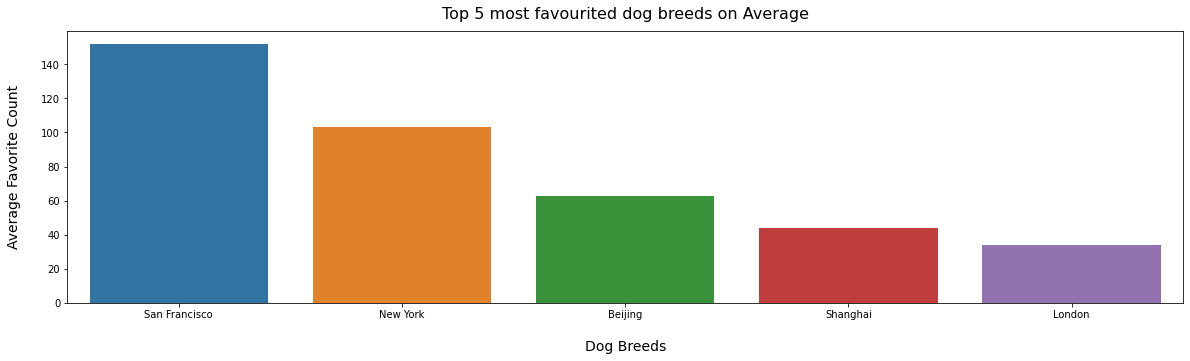

In [32]:
sns.barplot(x = 'city', y = 'count', data = top_5_cites)

plt.title('Top 5 most favourited dog breeds on Average', fontsize = 16 , pad = 12)
plt.xlabel('Dog Breeds', fontsize = 14, labelpad=20)
plt.ylabel('Average Favorite Count', fontsize = 14, labelpad=20)


plt.show();